In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


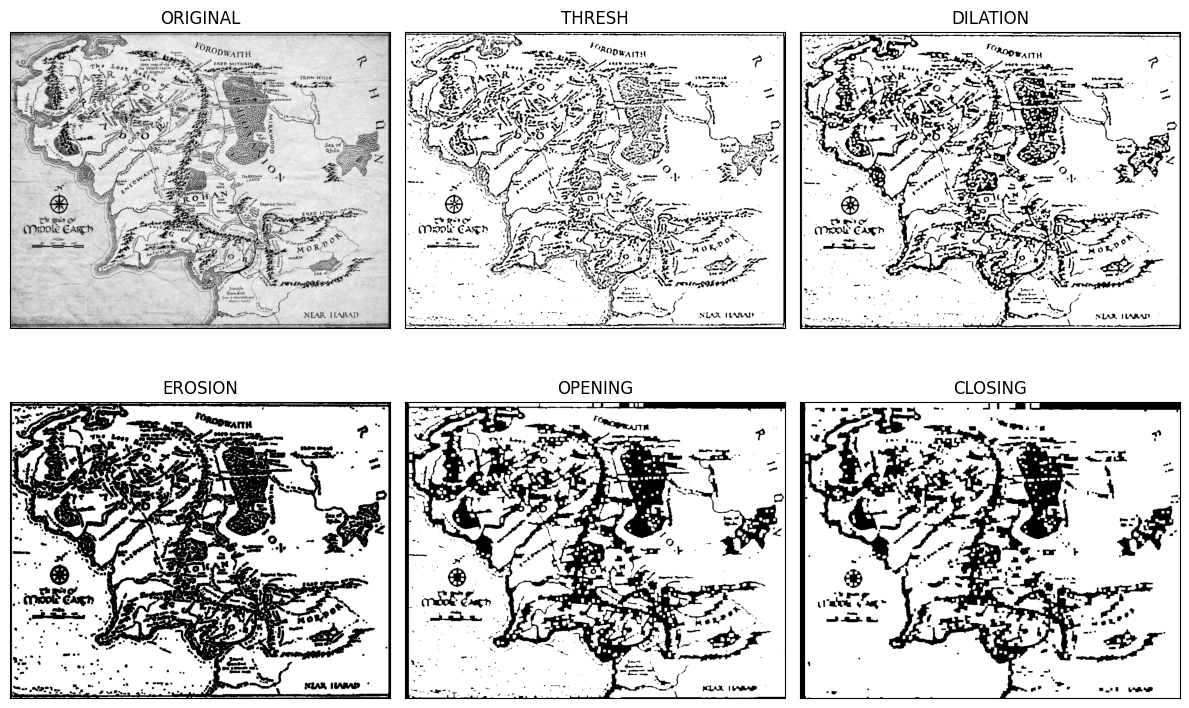

In [8]:
img = cv2.imread("map.png",0)
# img = cv2.cvtColor(cv2.COLOR_BGR2GRAY)
mblur=cv2.medianBlur(img,5)


# thresh , result = cv2.threshold(mblur,128,255,cv2.THRESH_BINARY)
result = cv2.adaptiveThreshold(mblur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 10)  
kernel = np.ones((2,2), dtype=np.uint8)                 # kernel = 2x2 [[1,1], [1,1]]


gblur = cv2.GaussianBlur(result, (5, 5), 2)

erosion = cv2.erode(result, kernel, iterations=3)
dilation = cv2.dilate(erosion, kernel, iterations=3)
opening = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel, iterations=5)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=3)


# Titles and images for display
titles = ["ORIGINAL", "THRESH", "DILATION", "EROSION", "OPENING", "CLOSING"]
images = [img, result, dilation, erosion, opening, closing]

# Plot the images
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')  # Display image in grayscale
    ax.set_title(titles[i])
    ax.set_xticks([])  # Hide x-axis ticks
    ax.set_yticks([])  # Hide y-axis ticks

plt.tight_layout()  # Ensure the layout doesn't overlap
plt.show()

In [6]:

cv2.imshow("Closing",closing)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
img = cv2.imread("map.png", 0)

# Apply median blur to reduce noise
mblur = cv2.medianBlur(img, 5)

# Kernel for morphological operations
kernel = np.ones((2, 2), dtype=np.uint8)

# Function to update the threshold value using trackbar
def update_threshold(val=0):
    th_val = cv2.getTrackbarPos("Threshold Value", "Output")  # Get the current trackbar value
    _, result = cv2.threshold(mblur, th_val, 255, cv2.THRESH_BINARY)  # Apply thresholding

    # Morphological operations
    erosion = cv2.erode(result, kernel, iterations=3)
    dilation = cv2.dilate(result, kernel, iterations=3)
    opening = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel, iterations=5)
    closing = cv2.morphologyEx(erosion, cv2.MORPH_CLOSE, kernel, iterations=3)

# Create a window to display results
cv2.namedWindow("Output")

# Create trackbar for threshold value (range 0 to 255)
cv2.createTrackbar("Threshold Value", "Output", 0, 255, update_threshold)

# Initial update with default threshold value (0)
update_threshold()

# Wait until the user presses 'x' to close the window
while True:
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break

cv2.imshow("Closing",closing)
cv2.destroyAllWindows()
